<a href="https://colab.research.google.com/github/Pam-Pam29/Probability-Distributions-Bayesian-Probability-and-Gradient-Descent-Implementation-Group_19/blob/main/Probability_Distributions%2C_Bayesian_Probability%2C_and_Gradient_Descent_Implementation_Group_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is the Poisson Distribution?**

The Poisson distribution is a discrete probability distribution that models the number of events occurring in a fixed interval of time or space, given that these events occur with a known constant mean rate and independently of the time since the last event.

*Think of it like counting*:

How many phone calls you get per hour

How many cars pass by per minute

How many defects appear in products

**Key Formula:**

P(X = k) = (λ^k × e^(-λ)) / k!

Where:

P(X = k) = probability of exactly k events occurring

λ (lambda) = average rate of occurrence (mean)

e = Euler's number (≈ 2.71828)

k = actual number of events (0, 1, 2, 3, ...)

k! = factorial of k


**When to Use Poisson Distribution**

1. You're counting rare events that happen randomly

2. Events don't affect each other (one event doesn't make another more likely)

3. The average rate stays the same

4. Only one event can happen at exactly the same moment


**How to Use Poisson Distribution**

Identify λ: Determine the average rate of occurrence

Define the interval: Specify the time/space period

Apply the formula: Calculate probabilities for different values of k

Interpret results: Understand what the probabilities mean in context

**Problem Scenario**

In remote and hybrid learning environments, understanding student engagement can be valuable for improving class interaction and participation strategies. One observable form of this engagement is how often students interact in the classroom chat during a live session.
For this project, we analyzed a real transcript from an online class. The transcript contains timestamped chat entries from students over the course of a 1 hour and 43 minute session (≈1.72 hours). The purpose is to model how often students engage during class time and predict future participation using a Poisson distribution.

Importantly, the instructor (Wakuma Tekalign Debela) was excluded from the data, as we are interested only in student interactions. After reviewing the transcript, we found that 12 unique students participated in the chat.


**Goal of the Analysis**

Given that 12 students interacted over ~1.72 hours, what’s the probability that 20 students will interact in a similar session that lasts just 1 hour?

**Transcipt Images**

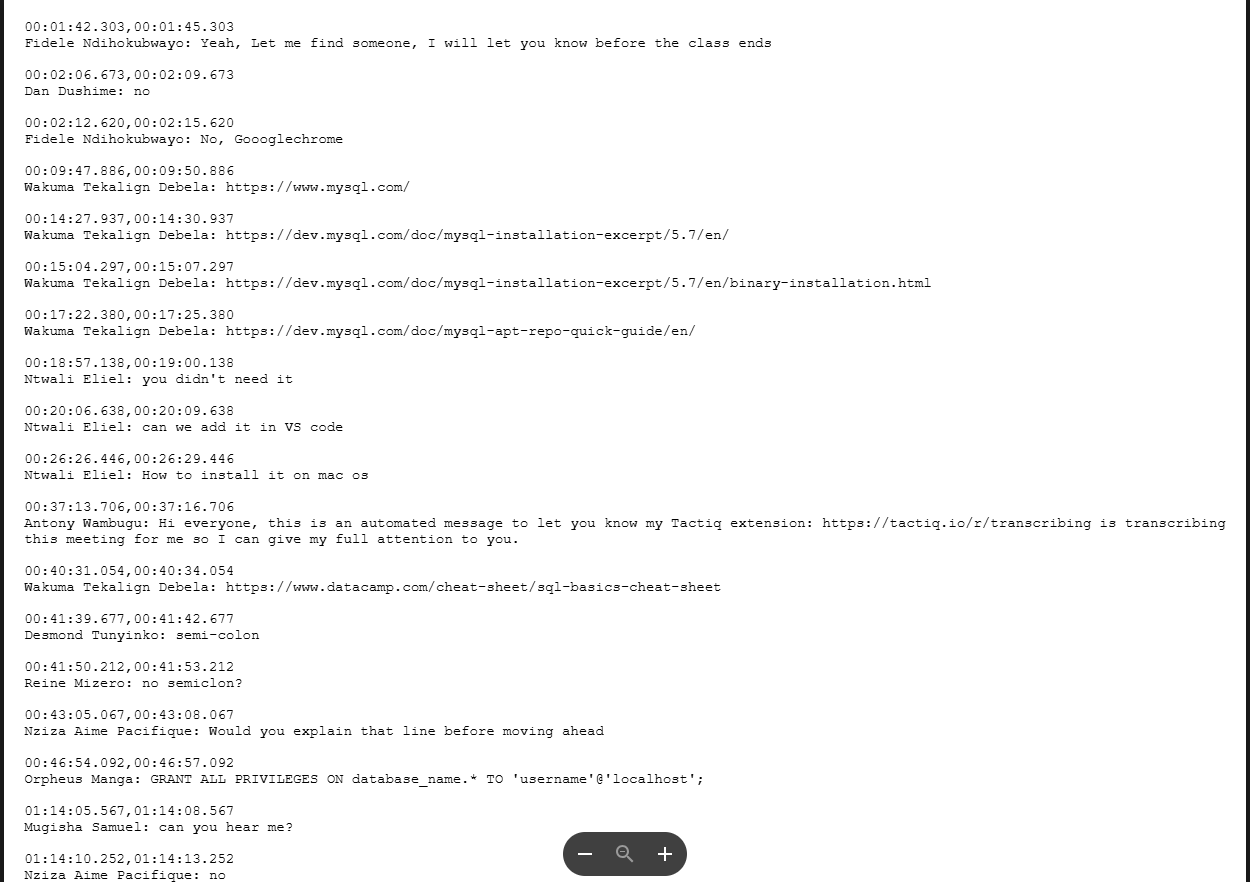





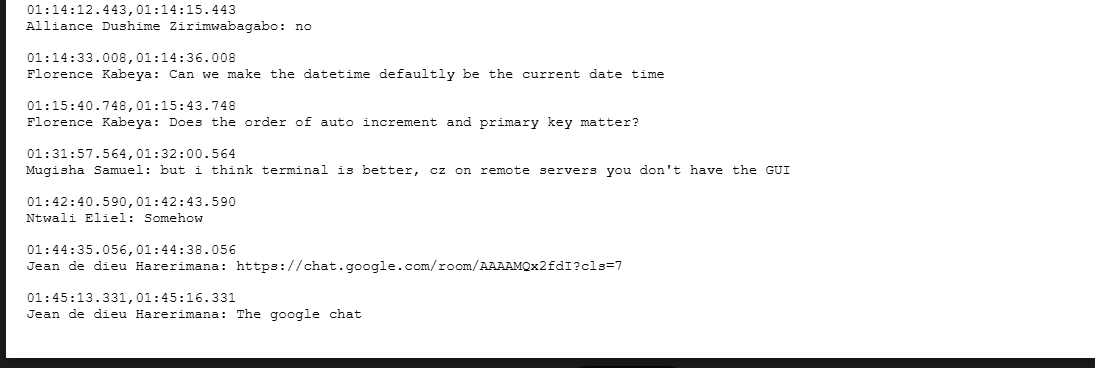



In [ ]:
# === Hardcoded Inputs ===
observed_students = 12     # from transcript (excluding teacher)
duration_hours = 1.72      # total class time in hours
target_k = 20              # number of students we want to predict for future
future_interval = 1        # in hours (1-hour class)

# === Helper Functions ===
def factorial(n):
  """Computes factorial"""
  f = 1
  for i in range(2,n+1):
    f *=i
  return f

def eul_approx(x,terms=55):
  """approximates e^x using a taylor series expansion"""
  eul = 0
  for n in range(terms):
    eul += (x ** n) / factorial(n)
  return eul

def poisson_probability(k, lambtha):
  """Computes Poisson probability using its formula i.e P(k; λ) = (e^-λ * λ^k) / k!"""
  e_neg_lambda = 1 / eul_approx(lambtha)
  numerator = (lambtha ** k) * e_neg_lambda
  denominator = factorial(k)
  return numerator / denominator

# === Main Logic ===
# Step 1: Estimate λ
lambda_estimate = (observed_students / duration_hours) * future_interval

# Step 2: Compute probability for target_k
prob_k = poisson_probability(target_k, lambda_estimate)

# === Display Results ===
print(f"Estimated λ = {lambda_estimate:.2f} interactions/hour")
print(f"Probability of exactly {target_k} interactions in 1 hour = {prob_k:.8f}")




Estimated λ = 6.98 interactions/hour
Probability of exactly 20 interactions in 1 hour = 0.00002864


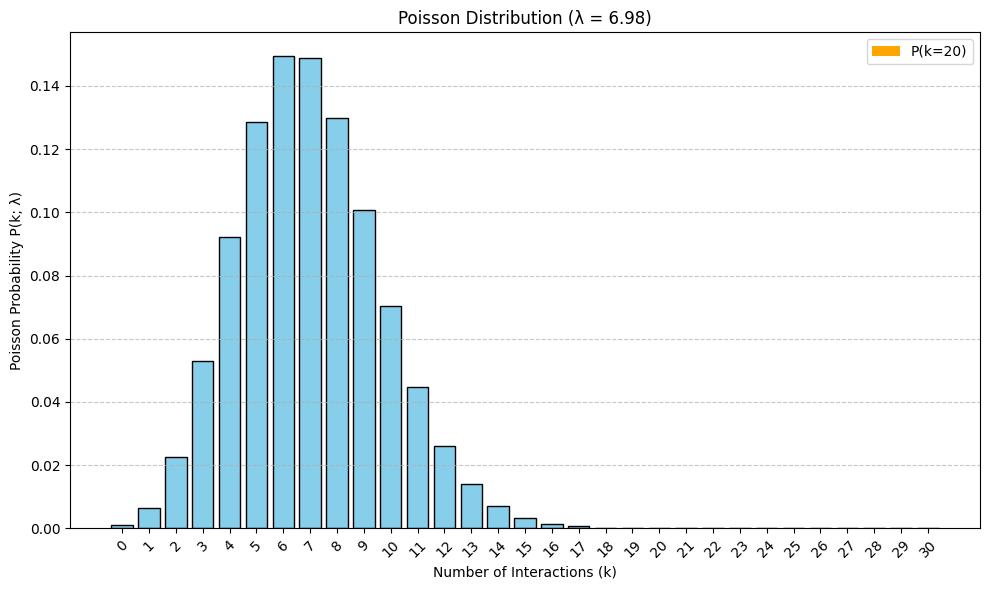

In [ ]:
import matplotlib.pyplot as plt

# Generate values for k from 0 to 30
k_values = list(range(0, 31))
probabilities = [poisson_probability(k, lambda_estimate) for k in k_values]

# Plot the Poisson distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, color='skyblue', edgecolor='black')
plt.xlabel("Number of Interactions (k)")
plt.ylabel("Poisson Probability P(k; λ)")
plt.title(f"Poisson Distribution (λ = {lambda_estimate:.2f})")
plt.xticks(k_values, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the target_k bar
if target_k in k_values:
    plt.bar(target_k, poisson_probability(target_k, lambda_estimate), color='orange', label=f'P(k={target_k})')
    plt.legend()

plt.tight_layout()
plt.show()



**Part 2: Bayesian Probability**


**The Formula**

P(A|B) = P(B|A) × P(A) / P(B)

Where:

P(A|B) = Posterior probability (probability of A given B)

P(B|A) = Likelihood (probability of B given A)

P(A) = Prior probability (initial belief about A)

P(B) = Marginal probability (total probability of B)


**Key Components Explained**

Prior Probability P(A): Your initial belief before seeing new evidence

Likelihood P(B|A): How likely the evidence is, given your hypothesis

Posterior Probability P(A|B): Updated belief after considering the evidence

Marginal Probability P(B): Total probability of observing the evidence



**QUESTION**

A patient visits a doctor for a routine check-up. The patient is a long-term smoker, and the doctor is concerned about the possibility of lung cancer. Medical studies show that long-term smoking significantly increases the risk of developing lung cancer. Based on this, the doctor estimates that even before any medical tests are conducted, there is an 8% prior probability that this patient has lung cancer.

The doctor then orders a CT scan, which returns a positive result for signs of lung cancer. The CT scan has the following characteristics:
 If the patient has lung cancer, the scan detects it 90% of the time. If the patient does not have lung cancer, the scan incorrectly shows a positive result 5% of the time.

What is the probability that this patient has lung cancer after two positive test result.

In [ ]:
def compute_posterior(prior, likelihood, false_positive):
    prior_complement = 1 - prior
    evidence = (likelihood * prior) + (false_positive * prior_complement)
    posterior = (likelihood * prior) / evidence
    return posterior

if __name__ == "__main__":
    PRIOR = 0.08
    LIKELIHOOD = 0.90
    FALSE_POSITIVE = 0.05

    print(f"Initial prior probability: {PRIOR*100:.2f}%\n")
    print("Test 1:")
    print(f"  Prior probability: {PRIOR*100:.2f}%")
    print(f"  Likelihood (True Positive Rate): {LIKELIHOOD*100:.2f}%")
    print(f"  False Positive Rate: {FALSE_POSITIVE*100:.2f}%")

    posterior_after_test1 = compute_posterior(PRIOR, LIKELIHOOD, FALSE_POSITIVE)
    print(f"  Posterior probability after test 1: {posterior_after_test1*100:.2f}%")




Initial prior probability: 8.00%

Test 1:
  Prior probability: 8.00%
  Likelihood (True Positive Rate): 90.00%
  False Positive Rate: 5.00%
  Posterior probability after test 1: 61.02%


In [ ]:
def compute_posterior(prior, likelihood, false_positive):
    prior_complement = 1 - prior
    evidence = (likelihood * prior) + (false_positive * prior_complement)
    posterior = (likelihood * prior) / evidence
    return posterior

if __name__ == "__main__":
    prior_after_test1 = 0.6102  # Replace with output from Test 1 script
    LIKELIHOOD = 0.90
    FALSE_POSITIVE = 0.05

    print("Test 2:")
    print(f"  Prior probability: {prior_after_test1*100:.2f}%")
    print(f"  Likelihood (True Positive Rate): {LIKELIHOOD*100:.2f}%")
    print(f"  False Positive Rate: {FALSE_POSITIVE*100:.2f}%")

    posterior_after_test2 = compute_posterior(prior_after_test1, LIKELIHOOD, FALSE_POSITIVE)
    print(f"  Posterior probability after test 2: {posterior_after_test2*100:.2f}%")



Test 2:
  Prior probability: 61.02%
  Likelihood (True Positive Rate): 90.00%
  False Positive Rate: 5.00%
  Posterior probability after test 2: 96.57%


**Significance of baysian interference**

The practical significance of Bayesian inference lies in its ability to guide decisions in uncertain environments not by assuming we know the truth, but by helping us update what we believe to be true, step by step.Bayesian inference can be then seen as  method of reasoning that helps us make better decisions by updating our beliefs based on new evidence. In this context, a belief simply means how strongly we think something is true and it’s a way of expressing uncertainty in the form of probability.

For example, if you think there's a 20% chance it might rain today, that 20% is your prior belief. Now, if you check the weather forecast and it shows dark clouds forming, you’d probably update that belief to a higher value lets say to maybe 60% or 70%. That updated belief is called the posterior.

This is the core idea behind Bayesian inference:


*   **You start with a prior, gather evidence, and update to a posterior.**



This process mirrors how humans often reason in real life. What makes Bayesian inference practically significant is that it formalizes this process in a mathematically sound way, allowing us to apply it across many fields.

**When to Use Bayesian Probability**

Bayesian methods are particularly useful when:

1. You have prior knowledge about the problem
2. You want to update beliefs as new data arrives
3. Dealing with uncertainty and incomplete information
4. Sequential decision making is involved
5. Small sample sizes are available



**Part 4: Gradient Descent in Code**


Converting the manual calculations into code using SciPy



In [ ]:
import numpy as np

# Data
X = np.array([1, 3])
Y = np.array([3, 6])

# Parameters
m = -1
b = 1
alpha = 0.1
n = len(X)

# Run 3 iterations
for iteration in range(1, 4):
    # Predictions
    y_pred = m * X + b

    # Residuals
    residuals = Y - y_pred

    # Gradients with correct factor (-2/n)
    dm = -(2/n) * np.sum(X * residuals)
    db = -(2/n) * np.sum(residuals)

    # Update m and b
    m = m - alpha * dm
    b = b - alpha * db

    # Mean Squared Error
    mse = np.mean(residuals**2)

    print(f"Iteration {iteration}:")
    print(f"  m = {m:.4f}")
    print(f"  b = {b:.4f}")
    print(f"  MSE = {mse:.4f}\n")


Iteration 1:
  m = 1.7000
  b = 2.1000
  MSE = 36.5000

Iteration 2:
  m = 1.2600
  b = 1.9000
  MSE = 1.0400

Iteration 3:
  m = 1.3400
  b = 1.9160
  MSE = 0.0640



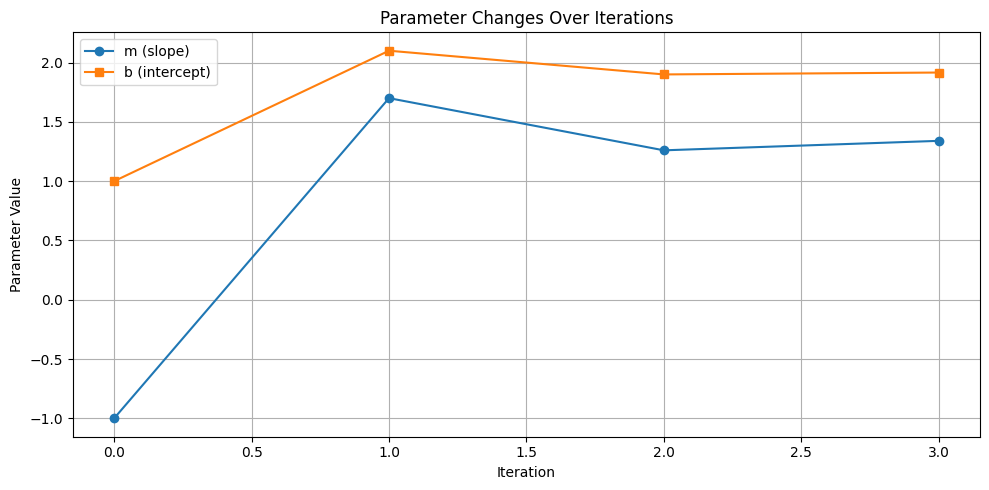

In [ ]:
import matplotlib.pyplot as plt

def plot_parameters(iterations, m_values, b_values):
    """
    Plots the changes in parameters m and b over iterations.

    Parameters:
    - iterations (list or range): list of iteration numbers (e.g., [0, 1, 2, 3])
    - m_values (list): values of m (slope) over iterations
    - b_values (list): values of b (intercept) over iterations
    """
    plt.figure(figsize=(10, 5))

    plt.plot(iterations, m_values, label='m (slope)', marker='o')
    plt.plot(iterations, b_values, label='b (intercept)', marker='s')

    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.title('Parameter Changes Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

iterations_range = list(range(0, iterations + 1))
plot_parameters(iterations_range, m_values, b_values)